In [271]:
import numpy as np
import pandas as pd
import datetime as dt
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [272]:
df = pd.read_csv('./data/Covid_data.csv',parse_dates=['Date de déclaration du cas'])

In [273]:
#The important dates are 20/3/2020 the lockdown
# 31/8/2020 reopening of schools
# 25/12/2020 the second lockdown
important_dates = {'first_lockdown':pd.to_datetime('2020-03-20'),
                   'schools_open':pd.to_datetime('2020-08-31'),
                   'second_lockdown':pd.to_datetime('2020-12-25')}

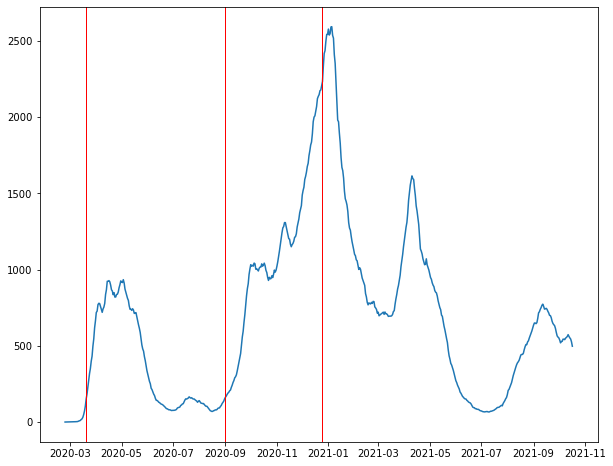

In [274]:
#Here I'm just creating a graph so we can visualize our data and where the significant events are located.
fig, ax = plt.subplots(figsize=[10,8])
ax.plot(df['Date de déclaration du cas'],df['Moyenne mobile (7 jours)'])
for key in important_dates:
    plt.axvline(important_dates[key], color='red', lw=1) # first lockdown

In [275]:
# Now I will split the data into 3 different sets for the RDD
# I will split it to 14 days before and after the occurence of the important date
# I googled covid incubation period and the first result said for most people it is max 14 days
dfs = {}
days = pd.Timedelta(days=14)
for key in important_dates:
    dfs[key] = df.loc[(df['Date de déclaration du cas'] >= important_dates[key] - days) & 
                           (df['Date de déclaration du cas'] <= important_dates[key]+days)]
    dfs[key] = dfs[key].reset_index()


In [276]:
# Now for each dataframe I will add a constant variable to the whole dataframe
# and I will also add a constant only to the variables after the significant date
for dataframe in dfs:
    dfs[dataframe]['rdd_constant'] = dfs[dataframe]['Date de déclaration du cas'] > dfs[dataframe].iloc[14,1]
    dfs[dataframe]['rdd_constant'] = dfs[dataframe]['rdd_constant'].astype(int)

In [277]:
dataframe = dfs['first_lockdown']
X = dataframe[['Date de déclaration du cas','rdd_constant']]
for i in range(len(X['Date de déclaration du cas'])):
    X.iloc[i,0] = i-14
X['Date de déclaration du cas'] = X['Date de déclaration du cas'].astype(int)

# Here I'm adding a polynomial term as it improves the model by lowering the AIC and BIC
X['Date^2'] = X['Date de déclaration du cas']*X['Date de déclaration du cas']

Y = pd.DataFrame(dataframe['Par lien épidémiologique'] + dataframe['En laboratoire'],
                columns=['Total Cases'])
model = sm.OLS(Y,sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total Cases   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     474.2
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           3.77e-22
Time:                        16:05:01   Log-Likelihood:                -145.22
No. Observations:                  29   AIC:                             298.4
Df Residuals:                      25   BIC:                             303.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        114.7940     17.252      6.654      0.000      79.263     150.325
Date de déclaration du cas    27.2649      1.734     15.723      0.000      23.694      30.836
rdd_constant                  64.1541     29.056      2.208      0.037       4.313     123.995
Date^2                         1.4807      0.116     12.747      0.000       1.241       1.720
==============================================================================
Omnibus:                        3.051   Durbin-Watson:                   2.800
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                1.647
Skew:                           0.361   Prob(JB):                        0.439
Kurtosis:                       3.917   Cond. No.                         420.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'First Lockdown')

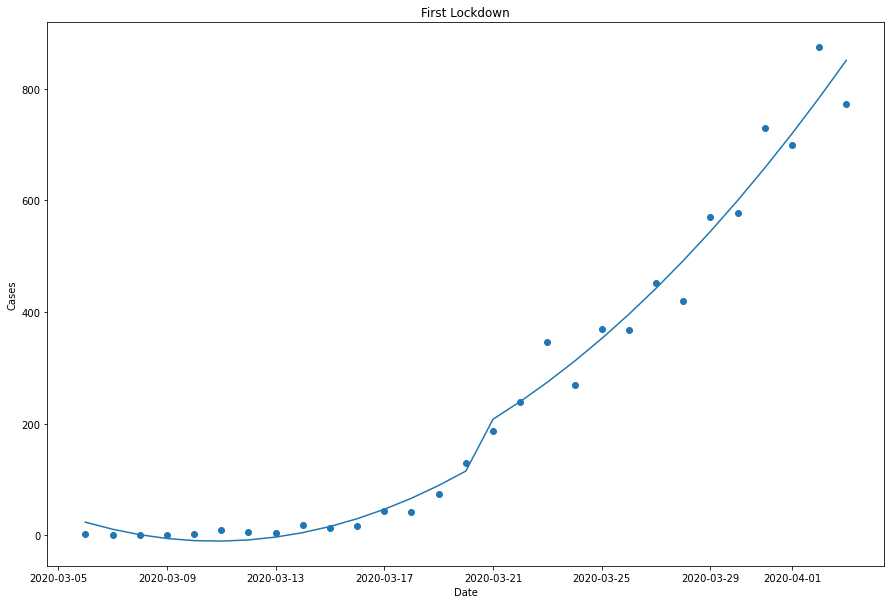

In [278]:
fig, ax = plt.subplots(figsize=[15,10])
fitted = model.predict(sm.add_constant(X))
ax.plot(dataframe['Date de déclaration du cas'],fitted)
ax.scatter(dataframe['Date de déclaration du cas'], Y['Total Cases'])
ax.set_xlabel('Date')
ax.set_ylabel('Cases')
ax.set_title('First Lockdown')

In [279]:
dataframe = dfs['schools_open']
X = dataframe[['Date de déclaration du cas','rdd_constant']]
for i in range(len(X['Date de déclaration du cas'])):
    X.iloc[i,0] = i-14
X['Date de déclaration du cas'] = X['Date de déclaration du cas'].astype(int)

# Here I'm adding a polynomial term as it improves the model by lowering the AIC and BIC
X['Date^2'] = X['Date de déclaration du cas']*X['Date de déclaration du cas']

Y = pd.DataFrame(dataframe['Par lien épidémiologique'] + dataframe['En laboratoire'],
                columns=['Total Cases'])
model = sm.OLS(Y,sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total Cases   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     95.37
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           8.12e-14
Time:                        16:05:02   Log-Likelihood:                -131.19
No. Observations:                  29   AIC:                             270.4
Df Residuals:                      25   BIC:                             275.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        136.0606     10.633     12.796      0.000     114.162     157.959
Date de déclaration du cas     7.7847      1.069      7.284      0.000       5.584       9.986
rdd_constant                  20.3050     17.908      1.134      0.268     -16.577      57.187
Date^2                         0.2222      0.072      3.103      0.005       0.075       0.370
==============================================================================
Omnibus:                        0.081   Durbin-Watson:                   1.492
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.230
Skew:                          -0.107   Prob(JB):                        0.891
Kurtosis:                       2.620   Cond. No.                         420.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Schools Open')

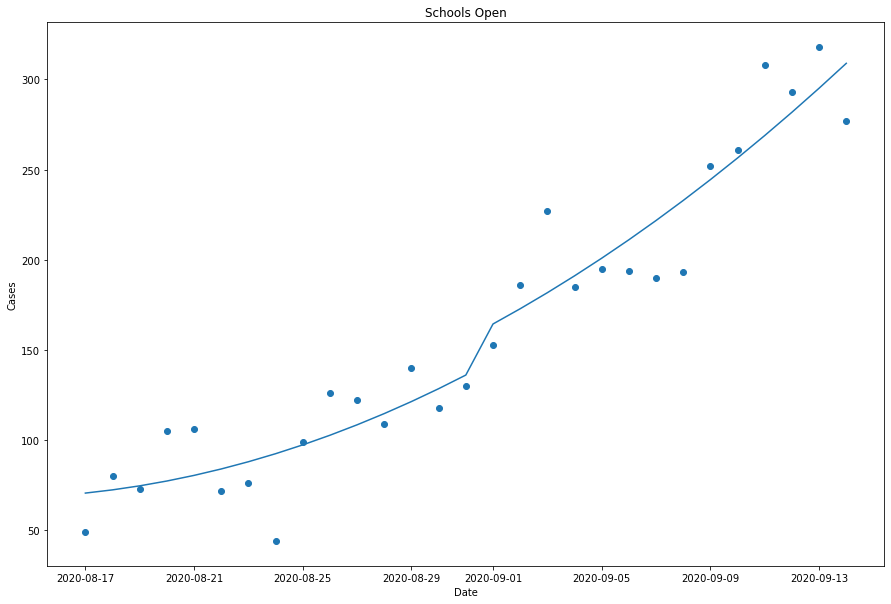

In [280]:
fig, ax = plt.subplots(figsize=[15,10])
fitted = model.predict(sm.add_constant(X))
ax.plot(dataframe['Date de déclaration du cas'],fitted)
ax.scatter(dataframe['Date de déclaration du cas'], Y['Total Cases'])
ax.set_xlabel('Date')
ax.set_ylabel('Cases')
ax.set_title('Schools Open')

In [281]:
dataframe = dfs['second_lockdown']
X = dataframe[['Date de déclaration du cas','rdd_constant']]
for i in range(len(X['Date de déclaration du cas'])):
    X.iloc[i,0] = i-14
X['Date de déclaration du cas'] = X['Date de déclaration du cas'].astype(int)

# Here I'm adding a polynomial term as it improves the model by lowering the AIC and BIC
#X['Date^2'] = X['Date de déclaration du cas']*X['Date de déclaration du cas']

Y = pd.DataFrame(dataframe['Par lien épidémiologique'] + dataframe['En laboratoire'],
                columns=['Total Cases'])
model = sm.OLS(Y,sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total Cases   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     30.28
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           1.62e-07
Time:                        16:05:02   Log-Likelihood:                -191.65
No. Observations:                  29   AIC:                             389.3
Df Residuals:                      26   BIC:                             393.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       2309.1034     76.547     30.166      0.000    2151.759    2466.448
Date de déclaration du cas    33.6148      8.411      3.997      0.000      16.327      50.903
rdd_constant                 -17.2857    140.820     -0.123      0.903    -306.744     272.173
==============================================================================
Omnibus:                        1.261   Durbin-Watson:                   1.303
Prob(Omnibus):                  0.532   Jarque-Bera (JB):                0.423
Skew:                           0.241   Prob(JB):                        0.809
Kurtosis:                       3.342   Cond. No.                         37.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Second Lockdown')

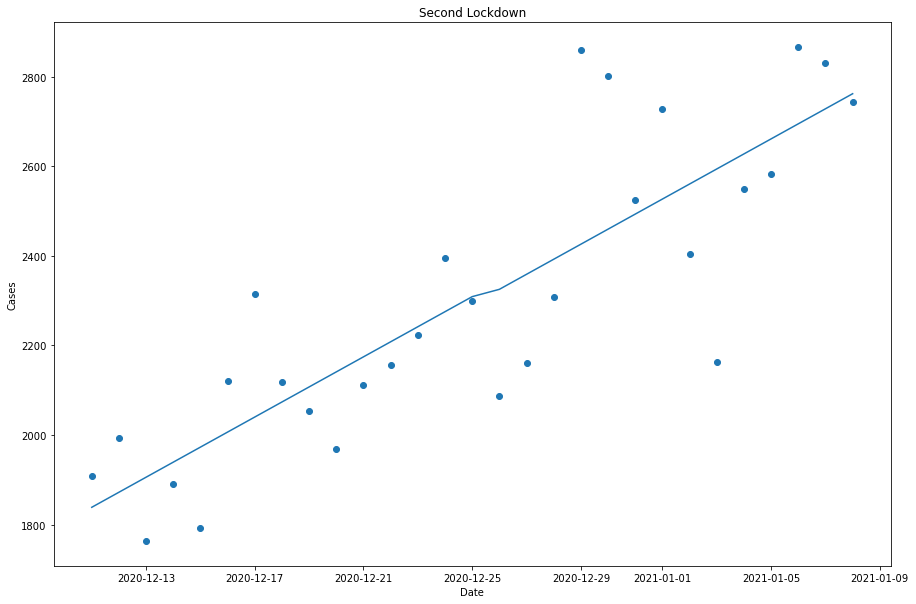

In [282]:
fig, ax = plt.subplots(figsize=[15,10])
fitted = model.predict(sm.add_constant(X))
ax.plot(dataframe['Date de déclaration du cas'],fitted)
ax.scatter(dataframe['Date de déclaration du cas'], Y['Total Cases'])
ax.set_xlabel('Date')
ax.set_ylabel('Cases')
ax.set_title('Second Lockdown')

So I set the time cutoff for all my regressions to be 14 days before and after the significant event. I based this off of the average incubation period for covid19. This makes sense to me as all new infections after the signifcant date are most likely to have occured from contact with people activley sick in the 14 days prior.

In my first and second models I include a 2nd degree polynomial term for the date variable as it improves the fit and lowers AIC and BIC in both. As for the third model I dropped it because it worsened the model.

In the first model for the first lockdown we can see that the rdd coefficient for after the start of the lockdown is statisitically signifcant with a pvalue of 0.037. This means we can interpret the lockdown as having a positive effect on the rate of new cases.

In the second model for the opening of schools we can see that the rdd coefficient for after the start of the lockdown is statisitically insignifcant with a pvalue of 0.268. This means we can interpret the opening of schools as having no significant effect on the predicted number of new cases.

In the third model for the second lockdown we can see that the rdd coefficient for after the start of the lockdown is statisitically insignifcant with a pvalue of 0.903. This means we can interpret the second lockdown as having no significant effect on the predicted number of new cases.

If I could change anything in my project I would have tested with different sized date ranges as I find my results to be a but inconclusive. I imagine it would also be of value to compare with the data of other countries that did not have lockdowns. Specifically analyzing the change in rate of new cases post significant dates in quebec and other regions.